## Assignment on sentiment analysis

#### Prepared by Amritha R J

In [1]:
# Importing libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\AMRITHA R J\Downloads\tweets.csv')

In [3]:
# Dataframe
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [4]:
# First 5 rows of the dataframe
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
# Last 5 rows of the dataframe
df.tail()

,id,label,tweet
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...


In [6]:
#No. of rows and columns in the dataframe
df.shape

(7920, 3)

In [7]:
#List of all columns present in the dataframe
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [8]:
#Checking for duplicate values
df.duplicated().sum()

0

In [9]:
#No. of unique values
df.nunique()

id       7920
label       2
tweet    7918
dtype: int64

In [10]:
# Data types
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [11]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

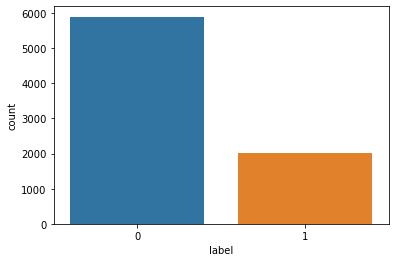

In [12]:
# Bar plot
import seaborn as sns
sns.countplot(x='label', data=df)

In [13]:
# New dataframe
data=df[['tweet','label']]

In [14]:
# Creating dataframes of positive and negative tweets
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [15]:
# New dataframe
dataset = pd.concat([data_pos, data_neg])

In [16]:
# Converting all alphabets to lower case
dataset['tweet']=dataset['tweet'].str.lower()
dataset['tweet'].tail()

7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, dtype: object

In [17]:
# Getting all stopwords in English
import nltk
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')

In [18]:
# Removing stopwords
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda tweet: cleaning_stopwords(tweet))
dataset['tweet'].head()

4     amazing service! apple even talk question unle...
5     iphone software update fucked phone big time s...
10    hey #apple make new ipod dont make new color ....
11    ha! heavy machinery need to. @apple really dro...
12    contemplating giving iphone bandwagon simply #...
Name: tweet, dtype: object

In [19]:
# Removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(tweet):
    translator = str.maketrans('', '', punctuations_list)
    return tweet.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely 90 year old neighbor ipad morni...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:
# Removing repetition
def cleaning_repeating_char(tweet):
    return re.sub(r'(.)1+', r'1', tweet)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely 90 year old neighbor ipad morni...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [21]:
# Removing numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely  year old neighbor ipad morning...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [22]:
# Tokenization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].head()

4     [amazing, service, apple, even, talk, question...
5     [iphone, software, update, fucked, phone, big,...
10    [hey, apple, make, new, ipod, dont, make, new,...
11    [ha, heavy, machinery, need, to, apple, really...
12    [contemplating, giving, iphone, bandwagon, sim...
Name: tweet, dtype: object

In [23]:
# Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_text(x))
dataset['tweet'].head()

4     [amazing, service, apple, even, talk, question...
5     [iphone, software, update, fucked, phone, big,...
10    [hey, apple, make, new, ipod, dont, make, new,...
11    [ha, heavy, machinery, need, to, apple, really...
12    [contemplating, giving, iphone, bandwagon, sim...
Name: tweet, dtype: object

In [24]:
# Lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    tweet = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].head()

4     [amazing, service, apple, even, talk, question...
5     [iphone, software, update, fucked, phone, big,...
10    [hey, apple, make, new, ipod, dont, make, new,...
11    [ha, heavy, machinery, need, to, apple, really...
12    [contemplating, giving, iphone, bandwagon, sim...
Name: tweet, dtype: object

In [25]:
# Defining X and y
X=data.tweet
y=data.label

In [26]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [27]:
# Fitting the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  84368


In [28]:
# Transforming
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

Trying two different algorithms just out of curiosity

In [29]:
# Fitting and predicting
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred = SVCmodel.predict(X_test)

In [30]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1187
           1       0.76      0.84      0.80       397

    accuracy                           0.89      1584
   macro avg       0.85      0.88      0.86      1584
weighted avg       0.90      0.89      0.90      1584



In [31]:
# Accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8945707070707071


In [32]:
# Fitting and predicting
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred3 = LRmodel.predict(X_test)

In [33]:
# Classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1187
           1       0.77      0.84      0.80       397

    accuracy                           0.90      1584
   macro avg       0.86      0.88      0.86      1584
weighted avg       0.90      0.90      0.90      1584



In [34]:
# Accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred3)
print(acc)

0.8952020202020202


Logistic regression has more accuracy